In [40]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [41]:
# Import and read CSV file

#collab
sleepy_url = "https://raw.githubusercontent.com/KalSun3/Group-1---Sleep-Prediction-Model/refs/heads/main/Data_Preparation/sleepytime_db.csv"


sleeptime_df = pd.read_csv(sleepy_url)
sleeptime_df.head()


,workouttime,readingtime,phonetime,workhours,caffeineintake,relaxationtime,sleeptime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50


                workouttime  readingtime  phonetime  workhours  \
workouttime        1.000000     0.003660   0.032513   0.037904   
readingtime        0.003660     1.000000   0.015178  -0.025202   
phonetime          0.032513     0.015178   1.000000   0.016314   
workhours          0.037904    -0.025202   0.016314   1.000000   
caffeineintake    -0.052671    -0.000996   0.012838  -0.004101   
relaxationtime     0.007783     0.026728  -0.041576   0.044206   
sleeptime          0.188368     0.067199  -0.322506  -0.298469   

                caffeineintake  relaxationtime  sleeptime  
workouttime          -0.052671        0.007783   0.188368  
readingtime          -0.000996        0.026728   0.067199  
phonetime             0.012838       -0.041576  -0.322506  
workhours            -0.004101        0.044206  -0.298469  
caffeineintake        1.000000       -0.041895  -0.076992  
relaxationtime       -0.041895        1.000000   0.144243  
sleeptime            -0.076992        0.144243   1.

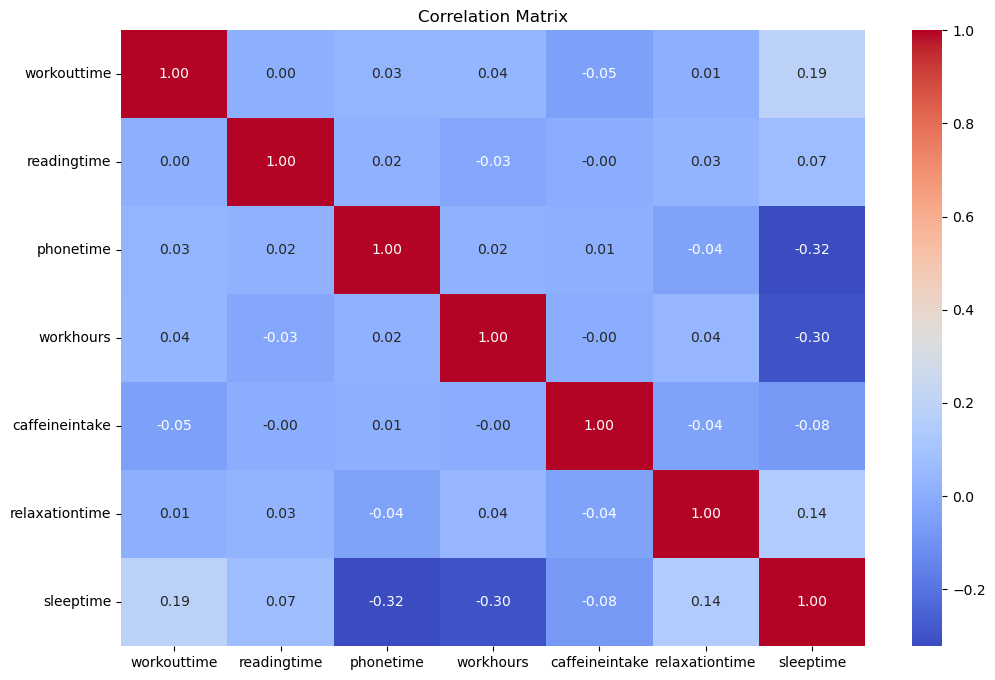

In [42]:
# Heatmap of correlations using seaborn
corr_matrix = sleeptime_df.corr()
print(corr_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [43]:
# Separate the data into labels and features
X = sleeptime_df.drop(columns=['sleeptime'])  #feature
y = sleeptime_df['sleeptime']  #target variable

In [44]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Create a StandardScaler
scaler = StandardScaler()

# Fit StandardScaler
X_scaler = scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")



Training set shape: (1600, 6)
Test set shape: (400, 6)


In [46]:

# Train the model using random forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)




RandomForestRegressor(random_state=42)

In [47]:
# Make a prediction
y_pred = model.predict(X_test)


In [48]:
#Evaluate the model for random forest
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


#Evaluate the model using regression


#print(f"Mean Squared Error: {mse}")

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 5.03
R-squared (R2 Score): 0.11


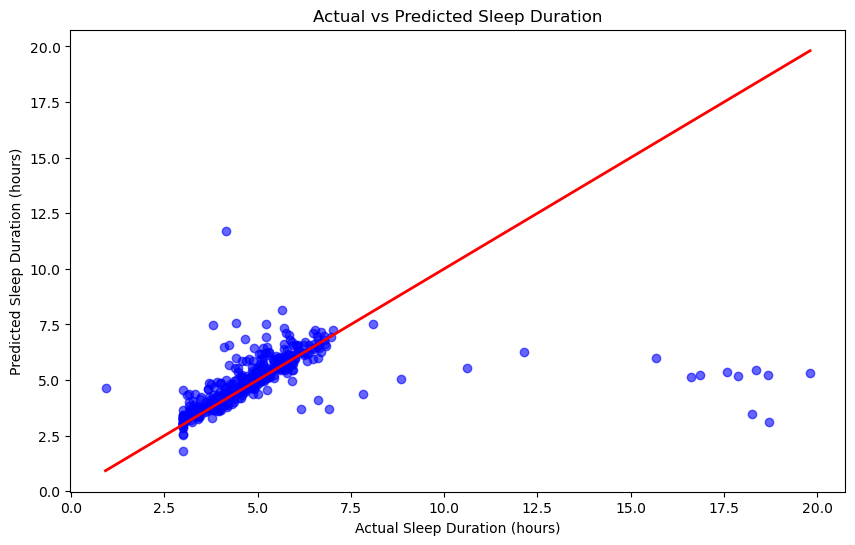

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Sleep Duration')
plt.xlabel('Actual Sleep Duration (hours)')
plt.ylabel('Predicted Sleep Duration (hours)')
plt.show()

In [58]:
def predict_sleep_time():
    print("\nInput values for prediction:")
    workouttime = float(input("Workout Time (hours): "))
    readingtime = float(input("Reading Time (hours): "))
    phonetime = float(input("Phone Time (hours): "))
    workhours = float(input("Work Hours: "))
    caffeineintake = float(input("Caffeine Intake (mg): "))
    relaxationtime = float(input("Relaxation Time (hours): "))

    new_data = pd.DataFrame({
        'workouttime': [workouttime],
        'readingtime': [readingtime],
        'phonetime': [phonetime],
        'workhours': [workhours],
        'caffeineintake': [caffeineintake],
        'relaxationtime': [relaxationtime]
    })

# Scale the new data
    new_data_scaled = scaler.transform(new_data)

# Predict sleeptime
    predicted_sleeptime = model.predict(new_data)
    print(f"\nPredicted Sleep Duration: {predicted_sleeptime[0]:.2f} hours")

In [57]:
predict_sleep_time()


Input values for prediction:


Workout Time (hours):  1
Reading Time (hours):  1
Phone Time (hours):  1
Work Hours:  8
Caffeine Intake (mg):  90
Relaxation Time (hours):  1



Predicted Sleep Duration: 5.39 hours


In [53]:
print(model)

RandomForestRegressor(random_state=42)


In [59]:
# Save the trained model
joblib.dump(model, '../random_forest_model.pkl')
joblib.dump(scaler, '../scaler.pkl')

['../scaler.pkl']